# **Airlines Flights Dataset for Different Cities**
The Flights Booking Dataset of various Airlines is a scraped datewise from a famous website in a structured format. The dataset contains the records of flight travel details between the cities in India. Here, multiple features are present like Source & Destination City, Arrival & Departure Time, Duration & Price of the flight etc.

This data is available as a CSV file. We are going to analyze this data set using the Pandas DataFrame.

This analyse will be helpful for those working in Airlines, Travel domain.

In [131]:
# import the required Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [132]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_columns', None)

In [133]:
# load the dataset
df = pd.read_csv('airlines_flights_data.csv')

# **1- Basic information about data**

In [134]:
#  display the first few rows of the dataset
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [135]:
# display the shape of the dataset
print(f' {df.shape[0]} rows and {df.shape[1]} columns.')

 300153 rows and 12 columns.


In [136]:
# display the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [137]:
# display the summary statistics of the dataset
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [138]:
# sample a few rows from the dataset
df.sample(5)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
72588,72588,GO_FIRST,G8-7537,Mumbai,Afternoon,one,Night,Hyderabad,Economy,8.17,18,3916
224656,224656,Air_India,AI-624,Delhi,Evening,one,Morning,Chennai,Business,15.92,45,45257
181522,181522,Indigo,6E-6006,Chennai,Afternoon,one,Late_Night,Delhi,Economy,9.33,11,7877
41250,41250,Air_India,AI-542,Delhi,Morning,one,Early_Morning,Chennai,Economy,22.25,39,3306
150850,150850,Air_India,AI-402,Kolkata,Morning,one,Morning,Chennai,Economy,22.50,31,5915


# **2- Cleaning the data**

In [139]:
# drop the index columns because it values we have already
df.drop(columns='index', inplace= True)

In [140]:
# check for missing values in the dataset
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [141]:
# check for duplicate rows in the dataset
duplicate_rows = df.duplicated().sum()
print(f'The dataset contains {duplicate_rows} duplicate rows.')

The dataset contains 0 duplicate rows.


In [142]:
# display column data types
print(df.dtypes)

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object


In [143]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [144]:
# max columns duration
df[df['duration'] == 49.830000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


In [145]:
# minimum duration
df[df['duration'] == 0.000000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


In [146]:
# most expensive flight
df[df['price']== 123071.000000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.5,3,123071


In [147]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [148]:
df.sample(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
42721,Vistara,UK-807,Delhi,Night,two_or_more,Morning,Chennai,Economy,15.17,47,8838
161449,Air_India,AI-9891,Hyderabad,Evening,two_or_more,Evening,Mumbai,Economy,23.83,22,7895
218868,Vistara,UK-953,Delhi,Night,one,Morning,Kolkata,Business,13.00,46,53209
149027,Vistara,UK-738,Kolkata,Evening,one,Evening,Chennai,Economy,21.58,13,11675
204201,Indigo,6E-6113,Chennai,Afternoon,one,Night,Hyderabad,Economy,5.92,20,2862


In [149]:
df_filter = df[
   
    (df['destination_city']=='Delhi') &
   
    (df['class']== 'Business') &
    (df['price']> 100000)
]
df_filter = df_filter.groupby('price').max()
print(df_filter)

        airline  flight source_city departure_time stops arrival_time  \
price                                                                   
100111  Vistara  UK-776     Kolkata        Evening   one      Evening   
100671  Vistara  UK-776     Kolkata        Evening   one      Evening   
101780  Vistara  UK-776     Kolkata        Morning   one        Night   
102648  Vistara  UK-772     Kolkata        Morning   one        Night   
103683  Vistara  UK-822     Chennai        Morning   one        Night   
104031  Vistara  UK-772     Kolkata        Morning   one        Night   
107492  Vistara  UK-776     Kolkata        Evening   one    Afternoon   
107576  Vistara  UK-774     Kolkata          Night   one    Afternoon   
108360  Vistara  UK-772     Kolkata        Morning   one        Night   
109217  Vistara  UK-772     Kolkata        Morning   one        Night   
111437  Vistara  UK-775      Mumbai      Afternoon   one        Night   
111883  Vistara  UK-850   Bangalore        Evening 

In [150]:
df[df['duration']== 49.830000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


In [151]:
# showing the figth duration minium
df[df['duration']== 0.830000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
115869,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,6,3498
115943,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,7,3498
116010,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,8,3498
116081,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,9,3498
116163,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,10,3498
116236,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,11,3498
116322,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,12,3498
116411,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,13,3498
116496,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,14,3498
116656,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,16,1924


In [152]:
df[df['price']==1105.000000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
203807,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,16,1105
203808,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,16,1105
203908,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,17,1105
203909,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,17,1105
204003,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,18,1105
...,...,...,...,...,...,...,...,...,...,...,...
206601,Indigo,6E-7261,Chennai,Morning,one,Evening,Hyderabad,Economy,7.92,49,1105
206602,Indigo,6E-611,Chennai,Evening,one,Late_Night,Hyderabad,Economy,8.25,49,1105
206603,Indigo,6E-581,Chennai,Morning,one,Evening,Hyderabad,Economy,9.17,49,1105
206604,Indigo,6E-7127,Chennai,Afternoon,one,Night,Hyderabad,Economy,9.50,49,1105


## Q.1. `What are the airlines in the dataset, accompanied by their frequencies?`

In [153]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [154]:
# display the number of unique airlines in the dataset
print(f'The dataset contains {df["airline"].nunique()} unique airlines.')


The dataset contains 6 unique airlines.


In [155]:
# display the unique airlines in the dataset
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [156]:
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

/var/folders/3r/yggkbbhn2zx2q7qwlxbp6dkw0000gn/T/ipykernel_877/3018070682.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_counts.index, y=airline_counts.values, palette='viridis')


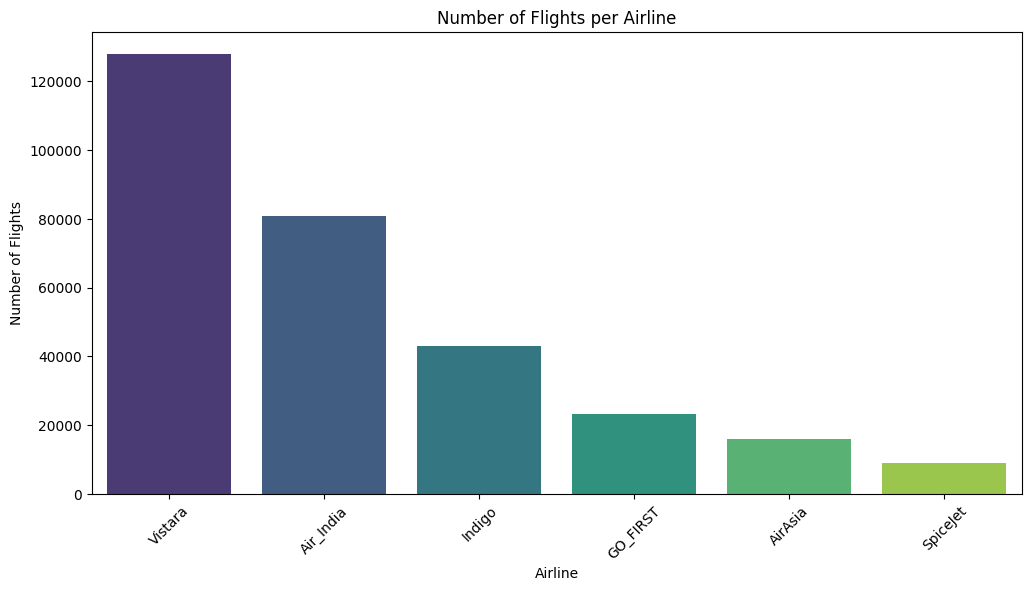

In [157]:
# showing all the airlines with the number of flights
airline_counts = df['airline'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=airline_counts.index, y=airline_counts.values, palette='viridis')
plt.title('Number of Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

## Q.2. `Show Bar Graphs representing the Departure Time & Arrival Time`

In [158]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [159]:
# Showing the Departure Time for the flights
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [160]:
# Showing the Arrival Time for the flights
df['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

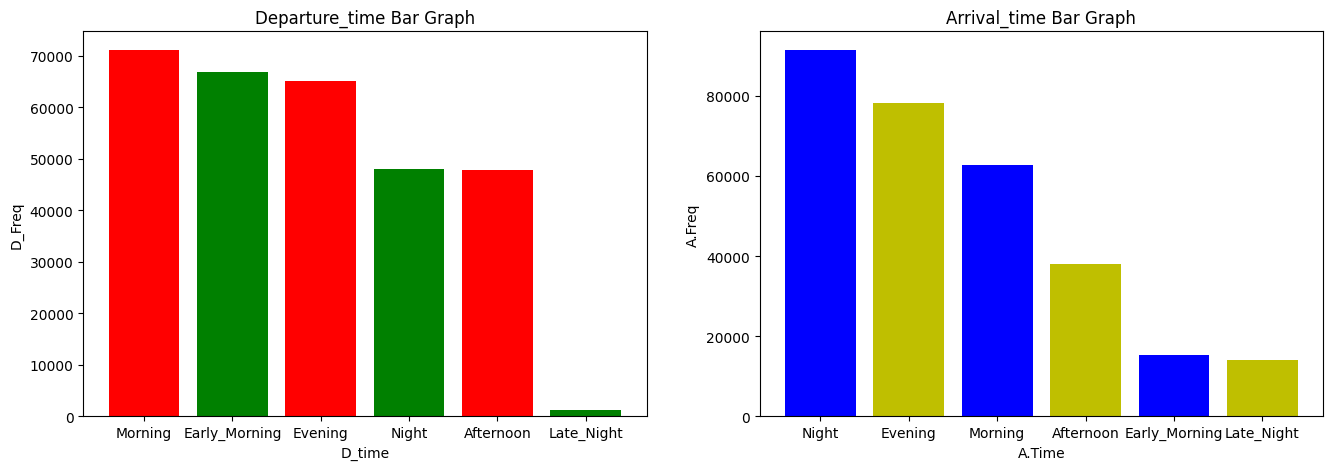

In [161]:
# createing a bar graph for the departure time and arrival time with their value count
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt.bar(df['departure_time'].value_counts().index,
        df['departure_time'].value_counts().values,
        color= ['r', 'g'])
plt.title('Departure_time Bar Graph')
plt.xlabel('D_time')
plt.ylabel('D_Freq')



plt.subplot(1,2,2)

plt.bar(df['arrival_time'].value_counts().index,
        df['arrival_time'].value_counts().values,
        color= ['b', 'y'])
plt.title('Arrival_time Bar Graph')
plt.xlabel('A.Time')
plt.ylabel('A.Freq')
plt.show

In [162]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


<Axes: >

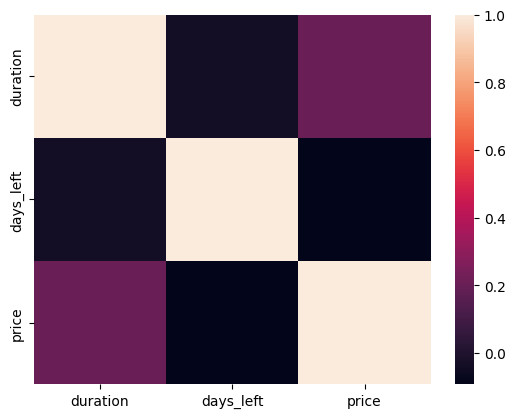

In [163]:
corrlation = df[['duration', 'days_left', 'price' ]].corr()
sns.heatmap(corrlation)

## Q.3. `Show Bar Graphs representing the Source City & Destination City`

In [164]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [165]:
# Score city name
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [166]:
# Score city number
df['source_city'].nunique()

6

In [167]:
# Score city value count
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [168]:
# Destination city name
df['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [169]:
# Destination city number
df['destination_city'].nunique()

6

In [170]:
# Destination city value count
df['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

Text(0, 0.5, 'Number of Filght')

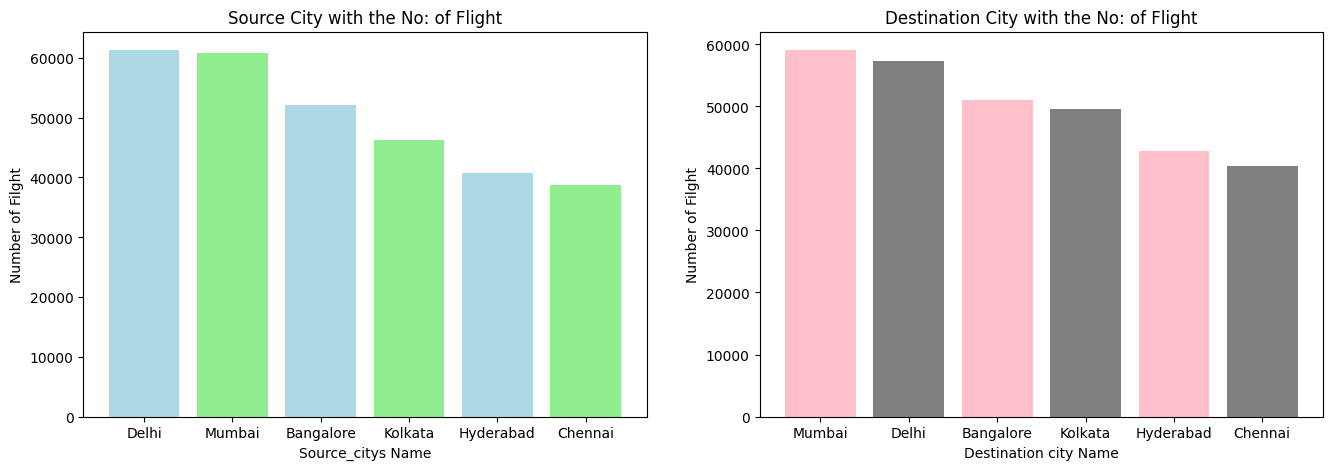

In [171]:
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
plt.bar(df['source_city'].value_counts().index, df['source_city'].value_counts().values, color=['lightblue', 'lightgreen'])
plt.title('Source City with the No: of Flight')
plt.xlabel('Source_citys Name')
plt.ylabel('Number of Filght')

plt.subplot(1,2,2)
plt.bar(df['destination_city'].value_counts().index, df['destination_city'].value_counts().values, color=['pink', 'gray'])
plt.title('Destination City with the No: of Flight')
plt.xlabel('Destination city Name')
plt.ylabel('Number of Filght')

## Q.4. `Does price varies with airlines ?`

In [172]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [173]:
# Show how many values have price column
df['price'].nunique()

12157

In [174]:
# Showing how many values have airline column
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [175]:
# Grouping the airlines and checking their mean price
df.groupby('airline')['price'].mean()

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

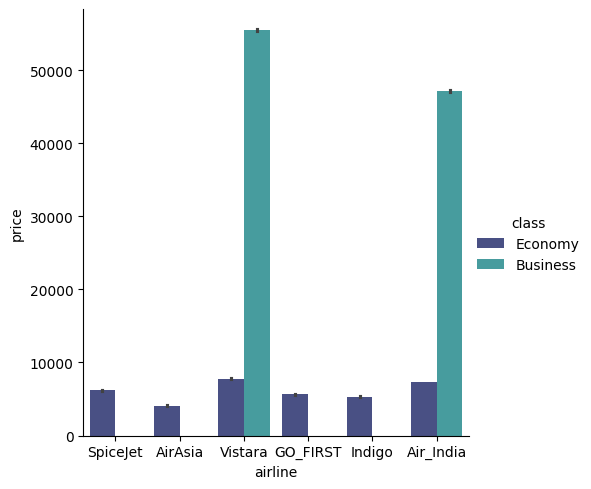

In [176]:
sns.catplot(x = 'airline', y = 'price', kind='bar', data=df, palette='mako', hue='class')
plt.show

## Q.5. `Does ticket price change based on the departure time and arrival time?`

In [177]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [178]:
# Checking the Mean Ticket Price based on the Departure Times
df.groupby('departure_time') ['price'].mean()

departure_time
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Late_Night        9295.299387
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64

In [179]:
# Checking the Mean Ticket Price based on the Rrrival_time Times
df.groupby('arrival_time') ['price'].mean()

arrival_time
Afternoon        18494.598993
Early_Morning    14993.139521
Evening          23044.371615
Late_Night       11284.906078
Morning          22231.076098
Night            21586.758341
Name: price, dtype: float64

/var/folders/3r/yggkbbhn2zx2q7qwlxbp6dkw0000gn/T/ipykernel_877/1021864852.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='arrival_time', y='price', data=df,palette='mako', kind='bar' )


<function matplotlib.pyplot.show(close=None, block=None)>

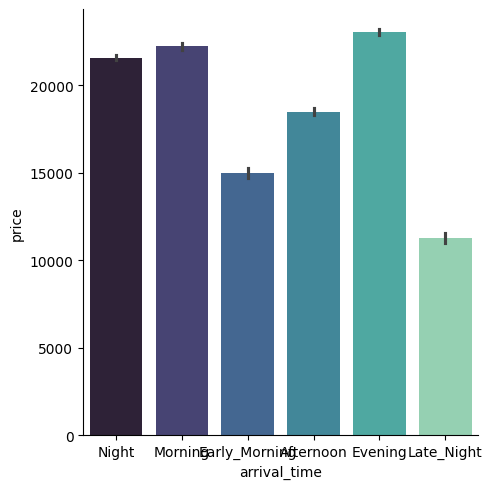

In [180]:
# Barplot of arrival time with price
sns.catplot(x='arrival_time', y='price', data=df,palette='mako', kind='bar' )
plt.show

/var/folders/3r/yggkbbhn2zx2q7qwlxbp6dkw0000gn/T/ipykernel_877/2691949246.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


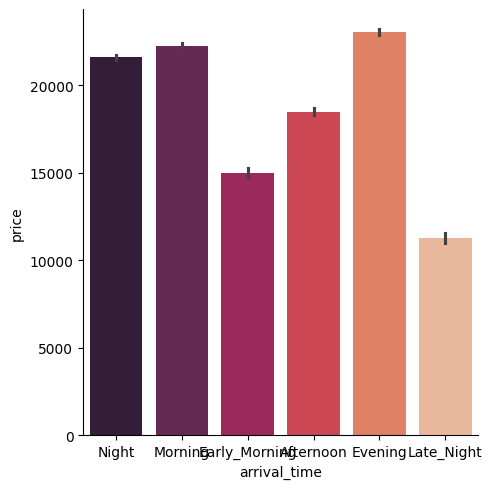

In [181]:
sns.catplot(
    x='arrival_time',
    y='price',
    data=df,
    kind='bar',
    palette='rocket'   # Creative and good-looking color palette
)
plt.show()


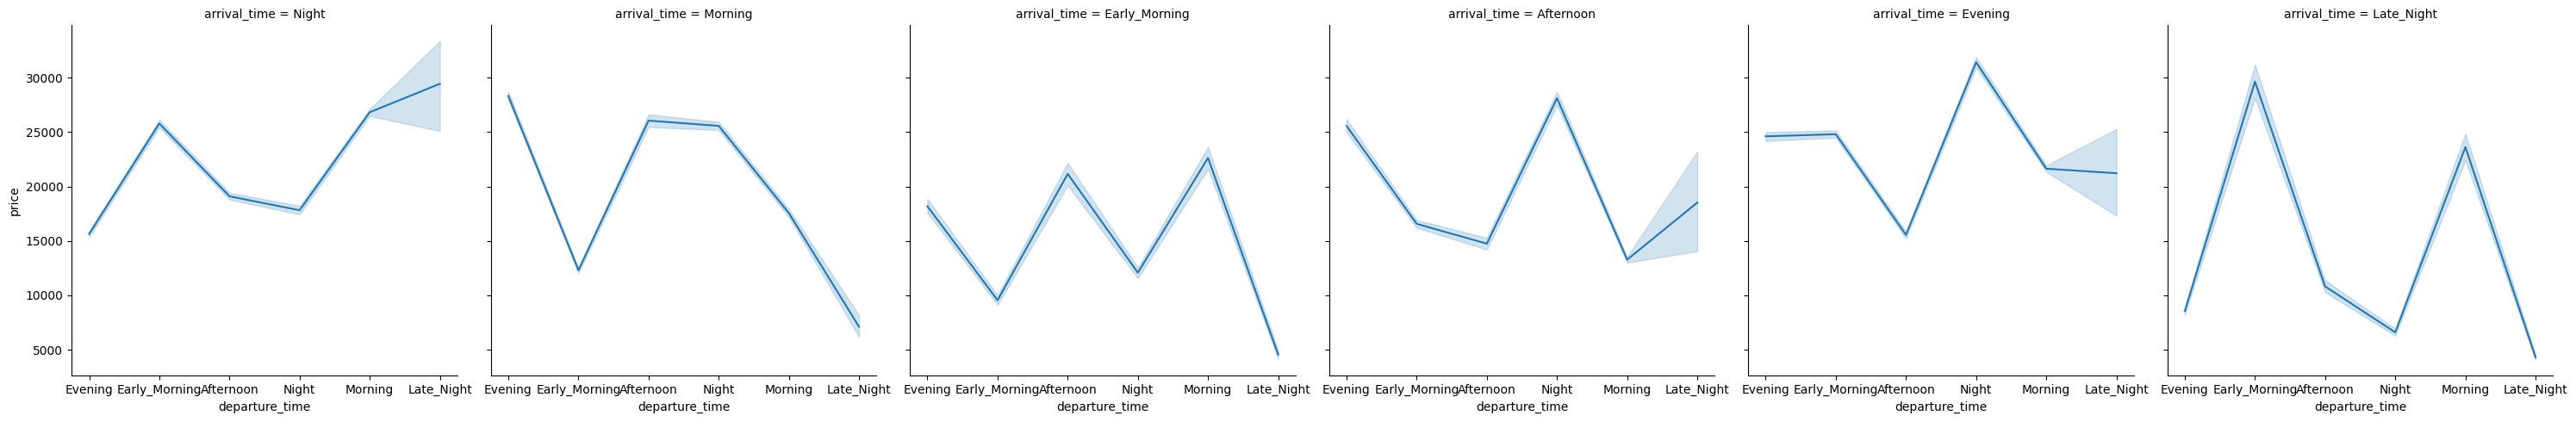

In [182]:
#
sns.relplot(x='departure_time', y='price', data=df, col='arrival_time', kind='line')

## Q.6. `How the price changes with change in Source and Destination?`

In [183]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [184]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [185]:
df['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [186]:
# Checking the Mean Ticket Price for different days_left
df.groupby('days_left') ['price'].mean()

days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
21    19430.494058
22    19590.667385
23    19840.913451
24    19803.908896
25    19571.641791
26    19238.290278
27    19950.866195
28    19534.986047
29    19744.653119
30    19567.580834
31    19392.706612
32    19258.135308
33    19306.271739
34    19562.008266
35    19255.652996
36    19517.688444
37    19506.306516
38    19734.912316
39    19262.095556
40    19144.972439
41    19347.440460
42    19154.261659
43    19340.528894
44    19049.080174
45    19199.876307
46    19305.351623
47    18553.272038
48    18998.126851
49    18992.971888
Name: price, dtype: float64

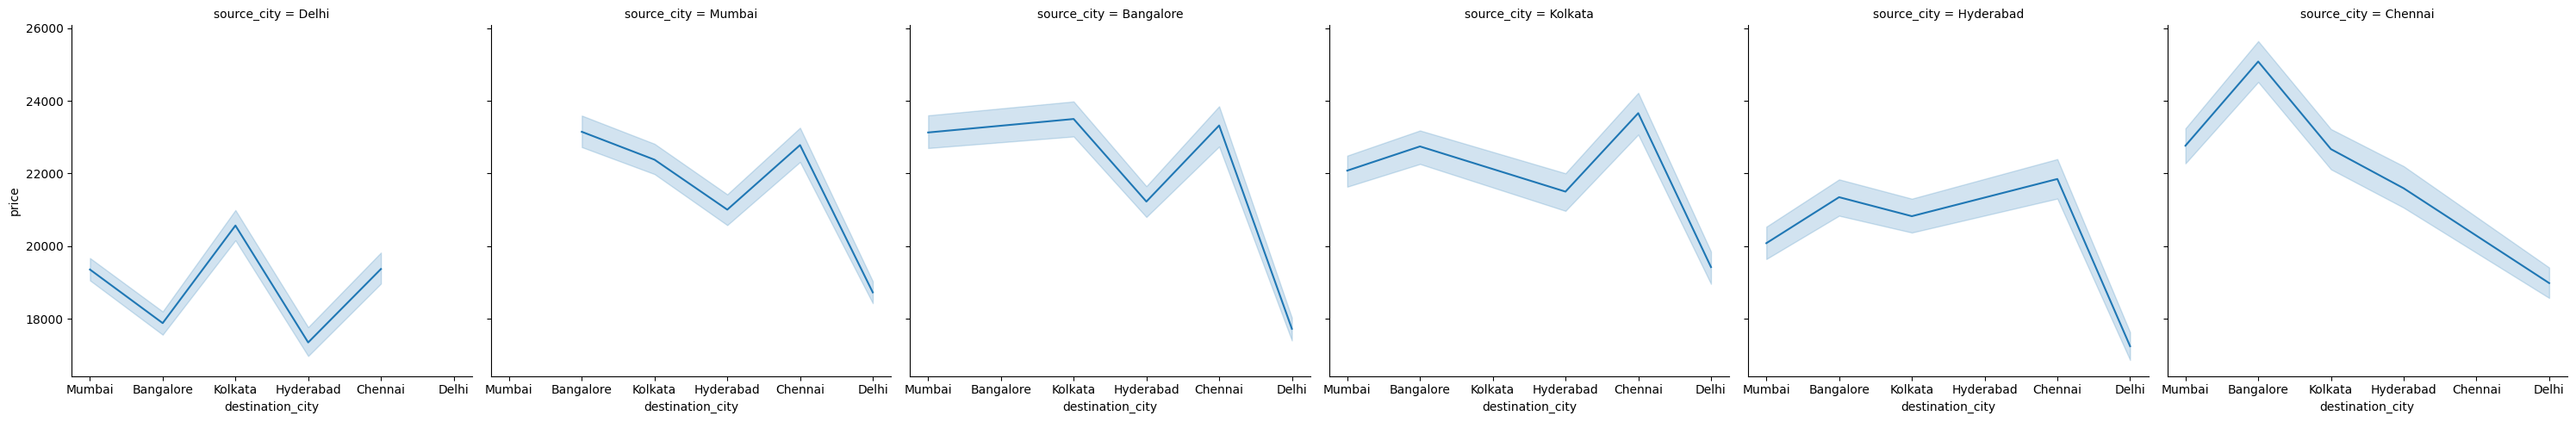

In [187]:
sns.relplot( x = 'destination_city', y = 'price', data = df, col = "source_city", kind = 'line')

plt.show()